## Chapter 5 Hypothesis Testing
#### MA 189 Data Dive Into Birmingham (with R)
##### _Blazer Core: City as Classroom_

Course Website: [Github.com/kerenli/statbirmingham/](https://github.com/kerenli/statbirmingham/) (to be published)


#### Levels:
<div class="alert-success"> Concepts and general information</div>
<div class="alert-warning"> Important methods and technique details </div>
<div class="alert-info"> Extended reading </div>
<div class="alert-danger"> (Local) Examples, assignments, and <b>Practice in Birmingham</b> </div>

##### <div class="alert alert-block alert-success"> Introduction </div>

Read the following story about Robert Swain, a Black man living in Talladega County, Alabama in 1965. In the county, 26% of those eligible for jury were Black but he went to trial with an all white jury. 

[![Reading: Robert Swain Legal Case](https://ajr348.github.io/ds4e_course/chapters/04_stats1/03_testing_hypotheses_1.html)](https://ajr348.github.io/ds4e_course/chapters/04_stats1/03_testing_hypotheses_1.html) (scroll down to start at Swain v Alamaba)


This historical legal case in Alabama gives us motivation for the important method of hypothesis testing which allows us to make conclusions about a population value based on evidence from sample values. 

By the end of this chapter, you will have the skills to perform a hypothesis test of your own.

<div class="alert alert-block alert-danger">
    <b>Application in Birmingham from Area of E-commerce </b>
</div>

As a further motivation for this chapter, consider the video below from Mr. Brad Kilpatrick of World Rugby Shop located here in Birmingham, AL. Mr. Kilpatrick explains his use of hypothesis testing in E-commerce. He dives into the details of the process of split-testing (which compares the performance of two versions of content to see which one appeals more to visitors/viewers) with website traffic with the goal of increasing sales and conversion rates (percentage of users completing an action desired by the company).



[![Video: World Rugby Shop Hypothesis Testing](https://youtu.be/NB0B8BRZS2A)](https://youtu.be/NB0B8BRZS2A)





### Hypothesis Testing

This method allows researchers to check whether data supports certain statements or predictions about a population. Hypotheses are usually expressed as population parameters for variables being measured in the study.

##### <div class="alert alert-block alert-success"> Hypotheses </div>

* A __null hypothesis__, $H_0$, is a statement that a population parameter is a particular value. 

* An __alternative hypothesis__, $H_a$, is a statement that the same population parameter falls in some alternative range of values. 


<div class="alert alert-block alert-danger"><b> Example:</b></div>


1. In auto racing, a pit crew claims that its mean pit stop time (for 4 new tires and fuel) is only 13 seconds. The driver thinks it's more and wants to investigate for efficiency purposes. 
2. Cocoa Puffs boxes claim there is an average of 19.3oz of cereal in the box. A grumpy college student believes the box contains less than 19.3oz and wants to find out more. 
3. According to Indeed.com, the average base salary for mechanical engineers in Alabama is \$100,272. You doubt this is accurate.



##### Your answer:

<div class="alert alert-block alert-danger"><b>Local Student Practice:</b> Hypotheses in Birmingham

</div>


1. Katrina hypothesizes that 90\% of college graduates from UAB believe a college degree is worth the cost. You disagree with her on her estimate.

2. A researcher finds that the mean pH level of the Cahaba River is 7.5 (https://www.researchgate.net/publication/268328332_Water_Quality_Conditions_in_the_Cahaba_River_and_Likely_Pollutant_Sources#pf35). An industrial company has reason to believe its lower. 

3. You think the average age of all lawyers in Birmingham is 43. Your friend challenges you on your estimate and wants to conduct a hypothesis test to gain more information.

4. According to this report (https://downtownbhm.com/wp-content/uploads/2024/04/Q3-Q4-2023-Data-Report-FINAL-1.pdf), the office occupancy in downtown Birmingham is 77.6%. You think it's higher and want to investigate yourself. 

5. It is claimed that Alabama's three oil refineries combined can process on average 142,000 barrels of crude oil per day (https://www.eia.gov/state/analysis.php). You are hesitant about the validity of that number and believe it's lower.







##### Your answer:

##### <div class="alert alert-block alert-success"> Hypothesis Tests </div>

Overview: 

* __Assumptions__: differ depending on the type of hypothesis test one is planning to perform (proportion, mean, one sample, two samples). Specifics are given in subsequent sections. 

* A __test statistic__ describes how many standard deviations the point estimate falls from the null hypothesis value.

* The __$p$-value__ is the probability that a given result (or a more significant result) would occur under the null hypothesis. <br>
Note: <br>
-Small $p$-value $\Rightarrow$ data is unlikely to have occurred under null hypothesis (i.e. assuming null hypothesis is true) $\Rightarrow$  strong evidence against null hypothesis. <br>
-Big $p$-value $\Rightarrow$ data is likely to have occurred under null hypothesis (i.e. assuming null hypothesis is true) $\Rightarrow$ not enough evidence against null hypothesis.<br>

* The __level of significance__, $\alpha$, is the maximum allowed probability of rejecting $H_0$ when it is actually true. <br>
Note: Most commonly, $\alpha=0.05$ or $\alpha=0.01$. The more important the context of a study is, the smaller $\alpha$ should be (for example, a cancer study versus a study on car color). We determine whether the $p$-value is small by comparing it with $\alpha.$





Hypothesis Test:
1. Identify the parameter ($p$ or $\mu$) and both hypotheses ($H_0$ and $H_a$) 
2. Decide if a normal distribution (for $p$) or a $t-$distribution (for $\mu$) is appropriate (check assumptions)
3. Use sample data to run test (get test statistic)
4. Decide if it would be unusual to get those results by chance ($p$-value sufficiently small) 
5. Conclude <br>
-If results are unusual ($p$-value sufficiently small, $H_0$ rare to occur), then reject $H_0$ in favor of $H_a$.<br>
-If results are not unusual ($p$-value sufficiently big, $H_0$ likely to occur), then the evidence is not strong enough to reject $H_0$. <br>

Important: Hypothesis Tests __never prove__ the null hypothesis. <br>
-If $p$-value $\leq \alpha$, the results are statistically significant. Reject $H_0$. "There is sufficient evidence to conclude that....(describe alternative hypothesis)." <br>
-If $p$-value $> \alpha$, the results are $\underline{not}$ statistically significant. Do not reject $H_0$. "There is $\underline{not}$ sufficient evidence to reject the belief that....(describe null hypothesis)." 

Statistically significant results mean they are unlikely to happen by chance variation between samples (the expected random variability). 


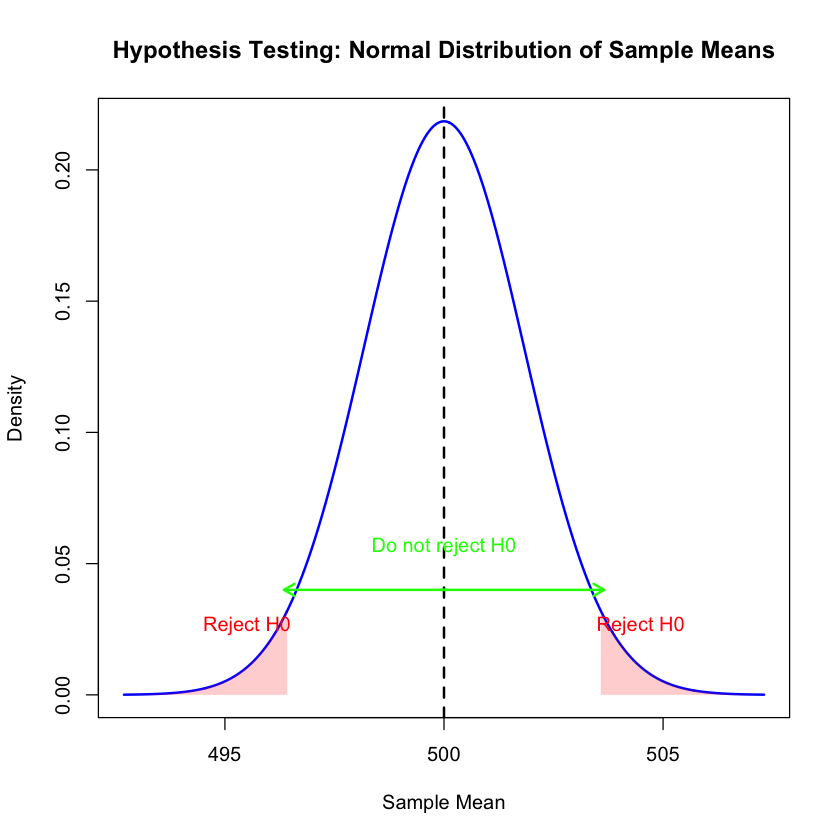

In [1]:
# Set up the parameters for the normal distribution
mu_null <- 500   # Null hypothesis mean (H0)
sd <- 10         # Standard deviation of the population
n <- 30          # Sample size
se <- sd / sqrt(n)  # Standard error of the mean
alpha <- 0.05    # Significance level (for a two-tailed test)

# Define the critical z-value for a two-tailed test
z_critical <- qnorm(1 - alpha/2)  # Critical value for a 95% confidence level

# Create a sequence of x values for plotting the normal distribution
x_values <- seq(mu_null - 4*se, mu_null + 4*se, length = 1000)

# Calculate the normal distribution (probability density function)
y_values <- dnorm(x_values, mean = mu_null, sd = se)

# Plot the normal distribution
plot(x_values, y_values, type = "l", lwd = 2, col = "blue",
     xlab = "Sample Mean", ylab = "Density",
     main = "Hypothesis Testing: Normal Distribution of Sample Means")

# Shade the critical regions (reject H0)
x_critical_left <- seq(min(x_values), mu_null - z_critical*se, length = 100)
x_critical_right <- seq(mu_null + z_critical*se, max(x_values), length = 100)
y_critical_left <- dnorm(x_critical_left, mean = mu_null, sd = se)
y_critical_right <- dnorm(x_critical_right, mean = mu_null, sd = se)

# Shade the rejection regions (critical regions)
polygon(c(min(x_critical_left), x_critical_left, max(x_critical_left)), c(0, y_critical_left, 0), col = rgb(1, 0, 0, 0.2), border = NA)
polygon(c(min(x_critical_right), x_critical_right, max(x_critical_right)), c(0, y_critical_right, 0), col = rgb(1, 0, 0, 0.2), border = NA)

# Annotate the critical regions
text(mu_null - z_critical*se - .5*se, 0.02, "Reject H0", col = "red", pos = 3)
text(mu_null + z_critical*se + .5*se, 0.02, "Reject H0", col = "red", pos = 3)

# Add a vertical line at the null hypothesis mean (H0)
abline(v = mu_null, col = "black", lwd = 2, lty = 2)

# Add arrows and text to show the acceptance region
arrows(mu_null - z_critical*se + 2*se, 0.04, mu_null - 2*se, 0.04, length = 0.1, col = "green", lwd = 2)
arrows(mu_null + z_critical*se - 2*se, 0.04, mu_null + 2*se, 0.04, length = 0.1, col = "green", lwd = 2)
text(mu_null, 0.05, "Do not reject H0", col = "green", pos = 3)


### One Sample

Hypothesis testing allows us to investigate whether the difference between a sample statistic and a presumed population parameter can be explained by random variability (in which the presumed population parameter cannot be rejected) or not (and the sample statistic is therefore unlikely to have occurred under the case of the presumed population parameter value and so the parameter value must be rejected).

##### <div class="alert alert-block alert-success"> One Sample Population Proportion Hypothesis Test </div>

Null Hypothesis: $H_0: p=p_0$<br>
Alternative Hypothesis: $H_a: p>p_0$ OR $H_a: p<p_0$ OR $H_a: p\neq p_0$

Assumptions:
1. Data obtained by randomization
2. $np_0\geq 15$ and $n(1-p_0)\geq 15$

Test Statistic: $z=\displaystyle \frac{\hat{p}-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$



<div class="alert alert-block alert-danger">
    <b>Example: </b> Promotion File Study
</div>

In a 1972 experiment, 48 male bank supervisors each judged a file randomly assigned to them to decide whether or not each person should receive a promotion. The files were IDENTICAL besides that half were labeled "male" and the other half labeled "female." In total, 35 files were recommended for promotion - 21 "male" files and 14 "female" files. Was there bias present against "female" files? 

##### Your answer:

<p align="center">
    <img src="../pics/zscoresnegative.png" alt="Figure 1" style="width:70%;"/>
</p>

<p align="center">
    <img src="../pics/zscorespositive.png" alt="Figure 1" style="width:70%;"/>
</p>

<div class="alert alert-block alert-danger">
    <b>Local Student Example: </b> Swain vs. Alabama
</div>

Consider again the Swain vs. Alabama historical legal case from the introduction of this chapter (https://ajr348.github.io/ds4e_course/chapters/04_stats1/03_testing_hypotheses_1.html). 

Read the first part of this section contextualizing the case in the framework of a hypothesis test:
https://ajr348.github.io/ds4e_course/chapters/04_stats1/04_testing_hypotheses_2.html

1. State the null and alternative hypotheses. 
2. What is the conclusion of the hypothesis test based on the evidence from the first reading?

##### Your answer:

##### <div class="alert alert-block alert-success"> One Sample Population Mean Hypothesis Test (One Sample $t$-test) </div>

Null Hypothesis: $H_0: \mu=\mu_0$<br>
Alternative Hypothesis: $H_a: \mu>\mu_0$ OR $H_a: \mu<\mu_0$ OR $H_a: \mu\neq \mu_0$

Assumptions: 
1. Data obtained by randomization.
2. Approximately normal population or $n\geq 30$.

Test Statistic: $t=\frac{\bar{x}-\mu_0}{\frac{s}{\sqrt{n}}}$ and $df=n-1$



<div class="alert alert-block alert-danger">
    <b>Local Application: </b> World Rugby Shop Page Views
</div>

The World Rugby Shop, based here in Birmingham, keeps careful records of its data. Consider the total number of page views for rugby shorts each week from users in Canada, the US, and the UK combined. 

1. Take a quick look at the data and make a hypothesis for what the average weekly number of pageviews is for this item. 
2. For sake of example, let's say someone believes it is 260 but you believe it is higher. You want to investigate this by taking a sample of 30 randomly selected weeks from available data from June 2020-April 2022 and performing a hypothesis test to test the belief that the average number of weekly views is higher than the hypothesized value (using $\alpha=0.05).$


In [4]:
# Install and load the necessary package
install.packages("readxl")
if (!require(readxl)) {
  install.packages("readxl")
  library(readxl)
}

# Define the path to the Excel file
file_path <- "../data/WRS Shorts Data - Canada, Australia, UK.xlsx"

# Read the Excel file from the "data" subfolder
WRS_data <- read_excel(file_path)
WRS_data




The downloaded binary packages are in
	/var/folders/fy/f4c7_n4n4zq0_s9stbf1yvj40000gq/T//RtmpiLdT2X/downloaded_packages


Week,Month,Dates,Year,Revenue ($),Paid Traffic ($),Organic Traffic ($),Direct Traffic ($),Referal Traffic ($),Total Pageviews,Average Bounce Rate,Avg. Page Load Time (sec)
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,June,1-7,2020,0.00,0.00,26.04,0.00,0.00,96,0.33333333,0.0000000
24,June,8-14,2020,34.99,0.00,0.00,0.00,34.99,141,0.16666667,1.5716444
25,June,15-21,2020,0.00,0.00,0.00,0.00,0.00,212,0.00000000,0.6572667
26,June,22-28,2020,0.00,0.00,0.00,0.00,0.00,476,0.00000000,2.7076833
27,June/July,29-30/1-5,2020,0.00,0.00,0.00,0.00,72.17,253,0.00000000,2.7430444
28,July,6-12,2020,294.86,0.00,57.36,0.00,0.00,940,0.00000000,0.0000000
29,July,13-19,2020,0.00,0.00,0.00,0.00,0.00,294,0.00000000,0.0000000
30,July,20-26,2020,0.00,0.00,0.00,0.00,0.00,293,0.00000000,0.6916667
31,July/August,27-31/1-2,2020,0.00,0.00,0.00,0.00,45.94,648,0.00000000,0.4921333


##### Your answer:

In [ ]:
#this is a list of 30 randomly selected data points for pageviews 
x <- c(94,141,476,253,940,648,192,183,161,223,131,233,344,1118,455,425,121,243,258,349,162,416,521,390,424,365,606,349,420,380) 
length(x)
sd(x)
mean(x)

##### t-Distribution Table (Critical Values)

| Degrees of Freedom (df) | 90% CI (α = 0.10) | 95% CI (α = 0.05) | 98% CI (α = 0.02) | 99% CI (α = 0.01) |
|-------------------------|-------------------|-------------------|-------------------|-------------------|
| 1                       | 6.314             | 12.706            | 31.821            | 63.657            |
| 2                       | 2.920             | 4.303             | 6.965             | 9.925             |
| 3                       | 2.353             | 3.182             | 4.541             | 5.841             |
| 4                       | 2.132             | 2.776             | 3.747             | 4.604             |
| 5                       | 2.015             | 2.571             | 3.365             | 4.032             |
| 6                       | 1.943             | 2.447             | 3.143             | 3.707             |
| 7                       | 1.895             | 2.365             | 2.998             | 3.499             |
| 8                       | 1.860             | 2.306             | 2.896             | 3.355             |
| 9                       | 1.833             | 2.262             | 2.821             | 3.250             |
| 10                      | 1.812             | 2.228             | 2.764             | 3.169             |
| 11                      | 1.796             | 2.201             | 2.718             | 3.106             |
| 12                      | 1.782             | 2.179             | 2.681             | 3.055             |
| 13                      | 1.771             | 2.160             | 2.650             | 3.012             |
| 14                      | 1.761             | 2.145             | 2.624             | 2.977             |
| 15                      | 1.753             | 2.131             | 2.602             | 2.947             |
| 20                      | 1.725             | 2.086             | 2.528             | 2.845             |
| 25                      | 1.708             | 2.060             | 2.485             | 2.787             |
| 30                      | 1.697             | 2.042             | 2.457             | 2.750             |
| ∞                       | 1.645             | 1.960             | 2.326             | 2.576             |



<div class="alert alert-block alert-danger">
    <b>Local Student Practice: </b> Birmingham Water Works 
</div>

The 2024 Annual Water Quality Report from Birmingham Water Works states that the average number of gallons of water delivered in 2023 was 115,593 measured in millions of gallons per day. 

You work for for an environmental agency and believe it's lower so you choose a random one month period (30 days) to do an audit and conclude that 99,000 millions of gallons were delivered on average per day with a standard deviation of 40,000 million gallons. Perform a hypothesis test to make a conclusion about the average number of gallons delivered (using a significance level of $\alpha=0.05$). 

##### Your answer:

### Two Samples

For samples taken from two populations, does the difference in the two sample proportions (or sample means) indicate a difference in the two population proportions (or population means)?

##### <div class="alert alert-block alert-success"> Two Sample Population Proportion Hypothesis Test </div>

Null Hypothesis: $H_0: p_1=p_2$ <br>
Alternative Hypothesis: $H_a: p_1<p_2$ OR $H_a: p_1>p_2$ OR $H_a: p_1\neq p_2$

Assumptions:
1. Data obtained by randomization
2. Two independent samples
3. $n_1\hat{p}_1\geq 10$ and $n_1(1-\hat{p}_1)\geq 10$ <br>
$n_2\hat{p}_2\geq 10$ and $n_2(1-\hat{p}_2)\geq 10$ 

If two-sided test (where $H_a: p_1\neq p_2$), replace $\geq 10$ above with $\geq 5$. 

Test Statistic:  $z =\displaystyle \frac{\hat{p}_1-\hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_1}+\frac{1}{n_2})}}$<br>
where $\hat{p}=\frac{X_1+X_2}{n_1+n_2}$ is the pooled proportion and $X_1$ and $X_2$ are considered the "successes" in the study measured in numbers (not proportions). Here, success just means whatever fits the criteria you are studying. 

<div class="alert alert-block alert-danger">
    <b>Local Example</b>: Prevalence of Food Insecurity in Alabama Counties 
</div>

Food insecurity is defined as "the condition of not having access to sufficient food, or food of an adequate quality, to meet one's basic needs." You want to know if the prevalance of food insecurity is similar across different areas of Alabama. 

Looking at data on Social Needs from the year 2023 (https://datausa.io/profile/geo/birmingham-al/?social-social_needs=food), you see that 14.1% of Jefferson County was food insecure compared to 9.6% in Shelby County. Suppose 1,000 were surveyed in Jefferson County and 1,000 in Shelby County for this study.

Does there appear to be a significantly higher prevalance of food insecurity in Jefferson County compared to Shelby County? By first choosing an appropriate $\alpha$ level, use the tool of hypothesis testing to make your conclusion.  


##### Your answer:

##### <div class="alert alert-block alert-success"> Two Sample Population Mean Hypothesis Test (Two Sample $t$-test) </div>

Null Hypothesis: $H_0: \mu_1=\mu_2$ <br>
Alternative Hypothesis: $H_a: \mu_1<\mu_2$ OR $H_a: \mu_1>\mu_2$ OR $H_a: \mu_1\neq \mu_2$

Assumptions:
1. Data obtained by randomization
2. Two independent samples
3. Approximately normal populations or $n_1, n_2 \geq 30$

Test Statistic: $t=\displaystyle \frac{\bar{x}_1-\bar{x}_2}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$

$df=$min$(n_1-1,n_2-1)$



<div class="alert alert-block alert-danger">
    <b>Local Application: </b> Birmingham vs. Huntsville temperatures
</div>

The temperature highs for all 31 days of May 2024 are given here for Birmingham, AL: https://www.accuweather.com/en/us/birmingham/35203/may-weather/346630 and here for Huntsville, AL: https://www.accuweather.com/en/us/huntsville/35801/may-weather/326704?year=2024

Based on these samples, at a significance level of $\alpha=0.05$, can it be concluded that Birmingham is warmer than Huntsville in May of each year?

In [ ]:
#For Birmingham
x <- c(86,87,85,85,89,87,84,87,87,82,78,81,72,79,81,84,74,86,85,86,87,88,88,87,91,92,90,88,86,84,86) 
length(x)
sd(x)
mean(x)

##### Your answer:

##### <div class="alert alert-block alert-success"> Chi-Squared Test of Independence Hypothesis Test </div>

We use this to test if two categorical variables shown in a two-way table (contigency table) are independent.

Reminder from Chapter 3 (part II):

* A __two-way table__ (</em> contingency table </em>) shows the relationship between two categorical variables by listing one variable in the rows and the other variable in the columns with table entries being frequencies.

* The __observed frequencies__ $(O)$ in a two-way table are the frequencies we actually see occur. 

* The __expected frequencies__ $(E)$ in a two-way table are the frequencies we would expect by chance if there were no relationship between the row and the column variables (i.e. assuming the variables are independent). We use this formula to calculate the expected frequency, E, for each cell:
 $$E =\frac{(row total)(column total)}{
n}$$
where $n$ is the grand total.

* The __chi-squared statistic__ is given by $$\chi ^ 2=\Sigma \frac{(O-E)^2}{E}$$
Note: The larger the value of $\chi ^ 2$, the greater the average difference between the observed and expected
frequencies in the cells.

* For two-way tables, __degrees of freedom__ are calculated by $df=(r-1)(c-1)$ where $r$ is number of rows and $c$ is number of columns. 

__Chi-Squared Test of Independence: Hypothesis Test__ 

Null Hypothesis: $H_0$: the variables are independent *(be specific about what the variables are) <br>
Alternative Hypothesis: $H_a$: the variables are dependent *(be specific about what the variables are)

Assumptions:
1. Data obtained by randomization
2. All Expected Values are at least 5. 

Test Statistic: $\chi ^ 2=\Sigma \frac{(O-E)^2}{E}$

$df=(r-1)(c-1)$ where $r$ is number of rows and $c$ is number of columns. 

Note: This will ALWAYS be a right-tailed test.

Conclusions: Rejecting the null means that there is evidence to suggest the variables are dependent. Failing to reject the null means there is not sufficient evidence to say that the variables are dependent (but it does NOT confirm the variables are actually independent). 


<div class="alert alert-block alert-danger">
    <b>Local Example</b>: Pizza Preference and Age
</div>

Suppose a survey is conducted here in Birmingham with the following questions: 1. Which pizza restaurant do you prefer: Slice, Pizza Grace, or Pizzeria G.M.? and 2. Are you over the age of 30? The responses are summarized in the two-way table below. 

<p align="center">
    <img src="../pics/Pizza v Age Table.png" alt="Figure 1" style="width:70%;"/>
</p>

Perform an appropriate test to see if pizza restaurant preference is independent of age. 



In [23]:
# calculating area to the *right* for chi-squared distribution 
# with inputs of chi-squared statistic and df
1-pchisq(37.353,2)


[1] 7.742819e-09

##### <div class="alert alert-block alert-success"> Types of Errors </div>

Type I error: when a researcher rejects a null hypothesis that is actually true in the population. <br>
Type II error: when a researcher fails to reject a null hypothesis that is actually false in the population.